<a href="https://colab.research.google.com/github/gabrielxcosta/Simulation-of-epidemiological-models-in-temporal-mobility-networks/blob/main/gold/baidu_mobility_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/JosephBARBIERDARNAL/pypalettes.git

  Cloning https://github.com/JosephBARBIERDARNAL/pypalettes.git to /tmp/pip-req-build-0nzmjqkl
  Running command git clone --filter=blob:none --quiet https://github.com/JosephBARBIERDARNAL/pypalettes.git /tmp/pip-req-build-0nzmjqkl
  Resolved https://github.com/JosephBARBIERDARNAL/pypalettes.git to commit dca5e52eb9a1d056f8959086135861165fcb55b2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pypalettes: filename=pypalettes-0.1.0-py3-none-any.whl size=364099 sha256=3e70ed9e8cca678bf84a9c86d1a5a8bc681db8a6da60e72b000f83e3e7a4c0f6
  Stored in directory: /tmp/pip-ephem-wheel-cache-d8lhik67/wheels/06/f0/c2/ec5d71a56bf510bffd590a1b704396f8a6c199581c44891b70
Successfully built pypalettes


In [ ]:
import os
import re
import time
import numpy as np
import pandas as pd
import pickle as pk
import seaborn as sns
from PIL import Image
import networkx as nx
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from pypalettes import load_cmap
import matplotlib.ticker as ticker
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d
from datetime import datetime, timedelta
from multiprocessing import Pool, cpu_count
from matplotlib.pyplot import FuncFormatter
from sklearn.metrics import mean_squared_error
from matplotlib.colors import LinearSegmentedColormap
sns.set_style('darkgrid')

# Raw data

In [ ]:
with open('/content/drive/MyDrive/data_IC/raw_flows.pkl', 'rb') as file:
    data = pk.load(file)

inflow, outflow = data

## Heatmap using Frobenius norm as metric

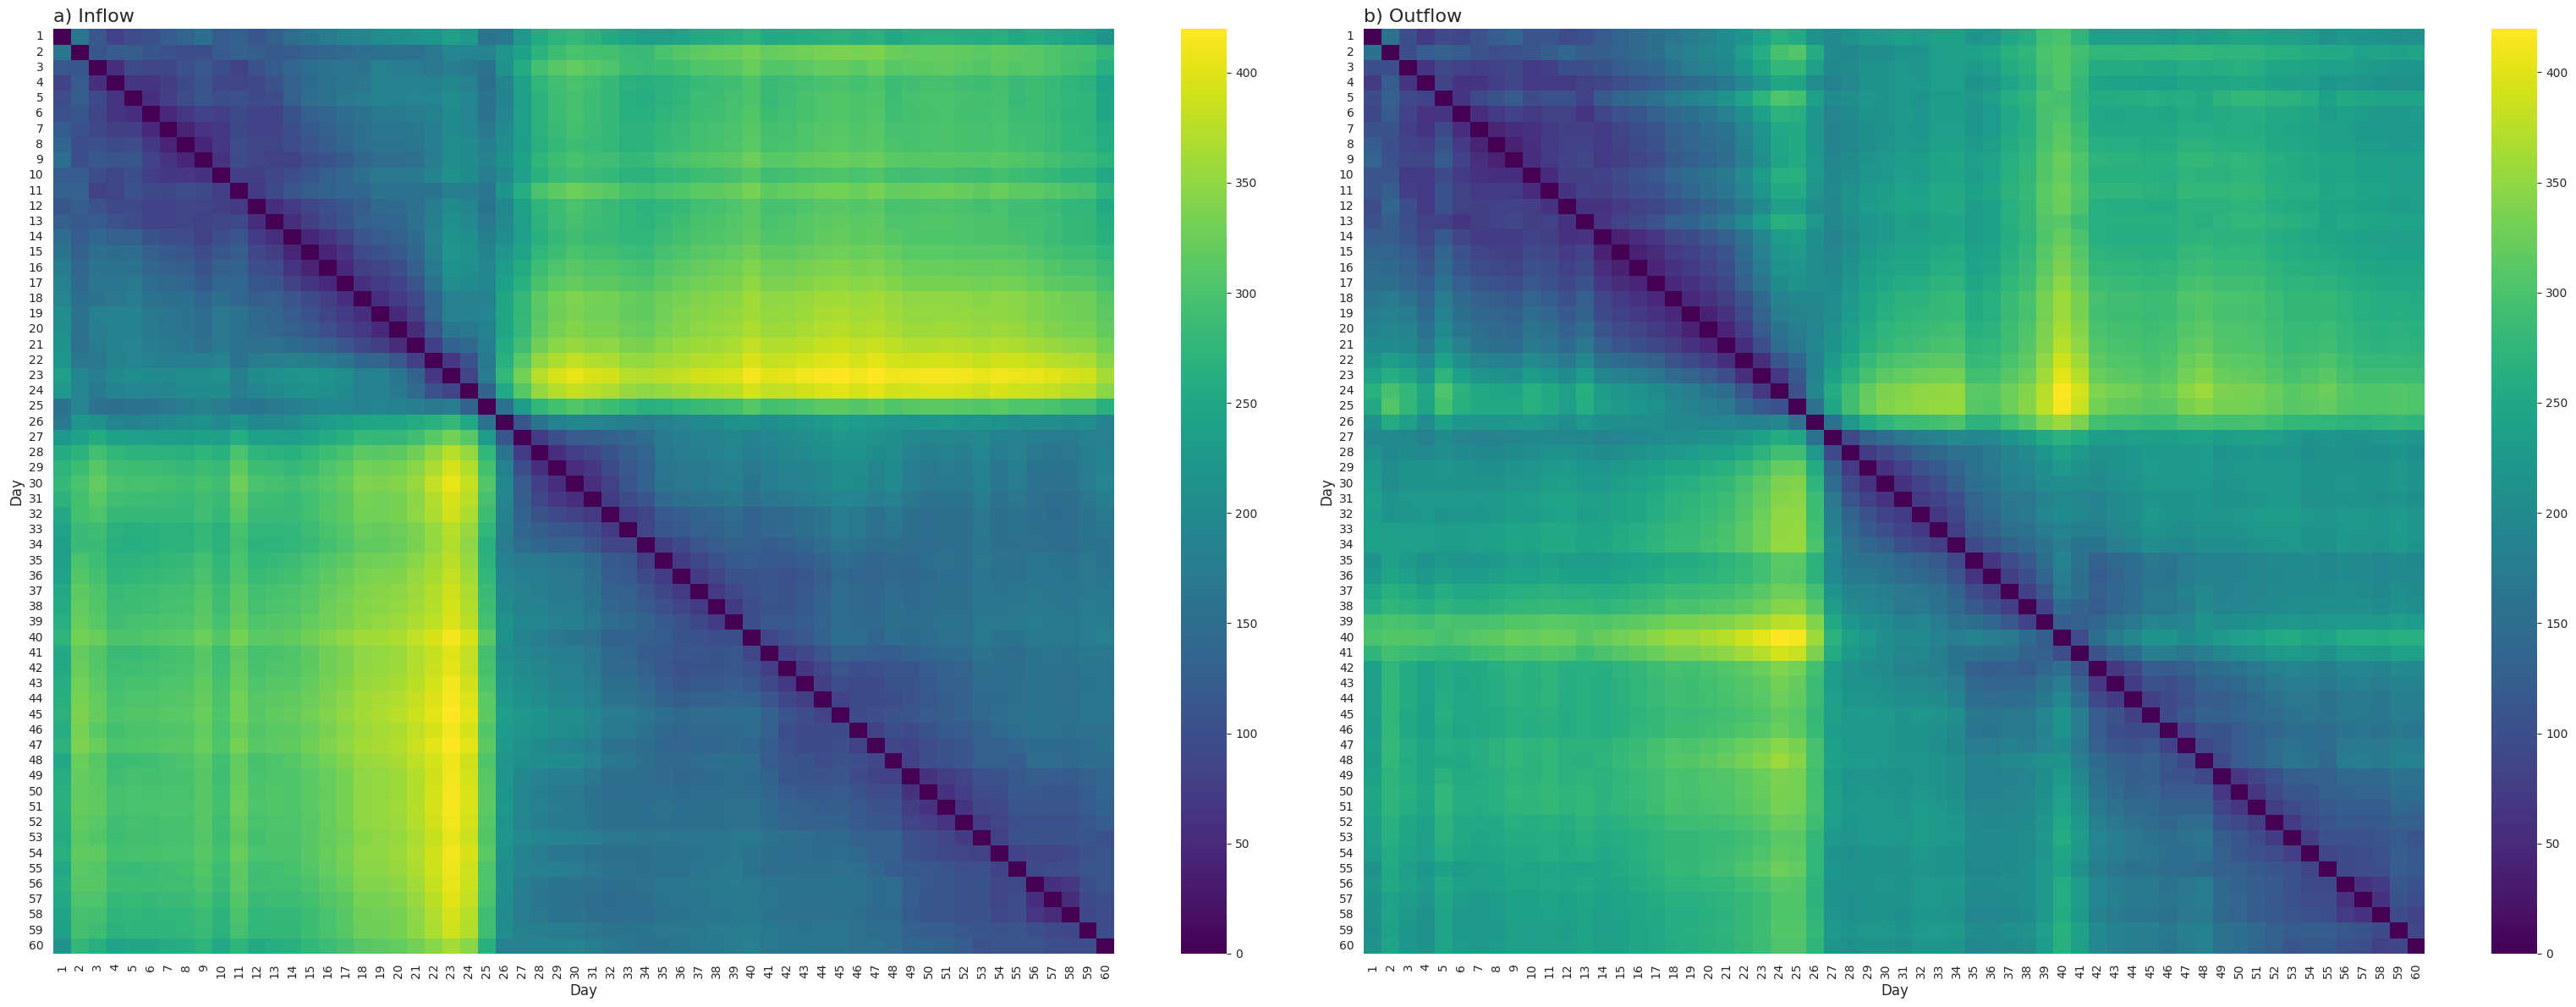

In [ ]:
# Calcular a norma de Frobenius entre as matrizes de adjacência ponderada
def calculate_frobenius_norms(matrix, all_matrices):
    norms = []
    for i in range(len(all_matrices)):
        norm = np.linalg.norm(matrix - all_matrices[i])
        norms.append(norm)
    return norms

# Calcular as normas de Frobenius para inflow e outflow em relação a todos os dias
inflow_frobenius_norms = []
outflow_frobenius_norms = []

for day in range(len(inflow)):
    inflow_norms = calculate_frobenius_norms(inflow[day], inflow)
    inflow_frobenius_norms.append(inflow_norms)

    outflow_norms = calculate_frobenius_norms(outflow[day], outflow)
    outflow_frobenius_norms.append(outflow_norms)

# Heatmap para inflow
plt.figure(figsize=(32, 12))
plt.subplot(1, 2, 1)
sns.heatmap(inflow_frobenius_norms, cmap='viridis')
plt.title('a) Inflow', fontsize=16, loc='left')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Ajuste dos eixos x e y para representar todos os dias
plt.xticks(np.arange(0.5, len(inflow_frobenius_norms)+0.5, 1), np.arange(1, len(inflow_frobenius_norms)+1, 1))
plt.yticks(np.arange(0.5, len(inflow_frobenius_norms)+0.5, 1), np.arange(1, len(inflow_frobenius_norms)+1, 1))
plt.tick_params(axis='both', which='both', width=1.5, length=5)

# Heatmap para outflow
plt.subplot(1, 2, 2)
sns.heatmap(outflow_frobenius_norms, cmap='viridis')
plt.title('b) Outflow', fontsize=16, loc='left')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Ajuste dos eixos x e y para representar todos os dias
plt.xticks(np.arange(0.5, len(outflow_frobenius_norms)+0.5, 1), np.arange(1, len(outflow_frobenius_norms)+1, 1))
plt.yticks(np.arange(0.5, len(outflow_frobenius_norms)+0.5, 1), np.arange(1, len(outflow_frobenius_norms)+1, 1))
plt.tick_params(axis='both', which='both', width=1.5, length=5)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/data_IC/comparing_OD_matrices_in_out/heatmap_raw_data.pdf')
plt.show()

# Normalized data

In [ ]:
with open('/content/drive/MyDrive/data_IC/normalized_flows.pkl', 'rb') as file:
    data_n = pk.load(file)

inflow_n, outflow_n = data_n

## Heatmap using Frobenius norm as metric

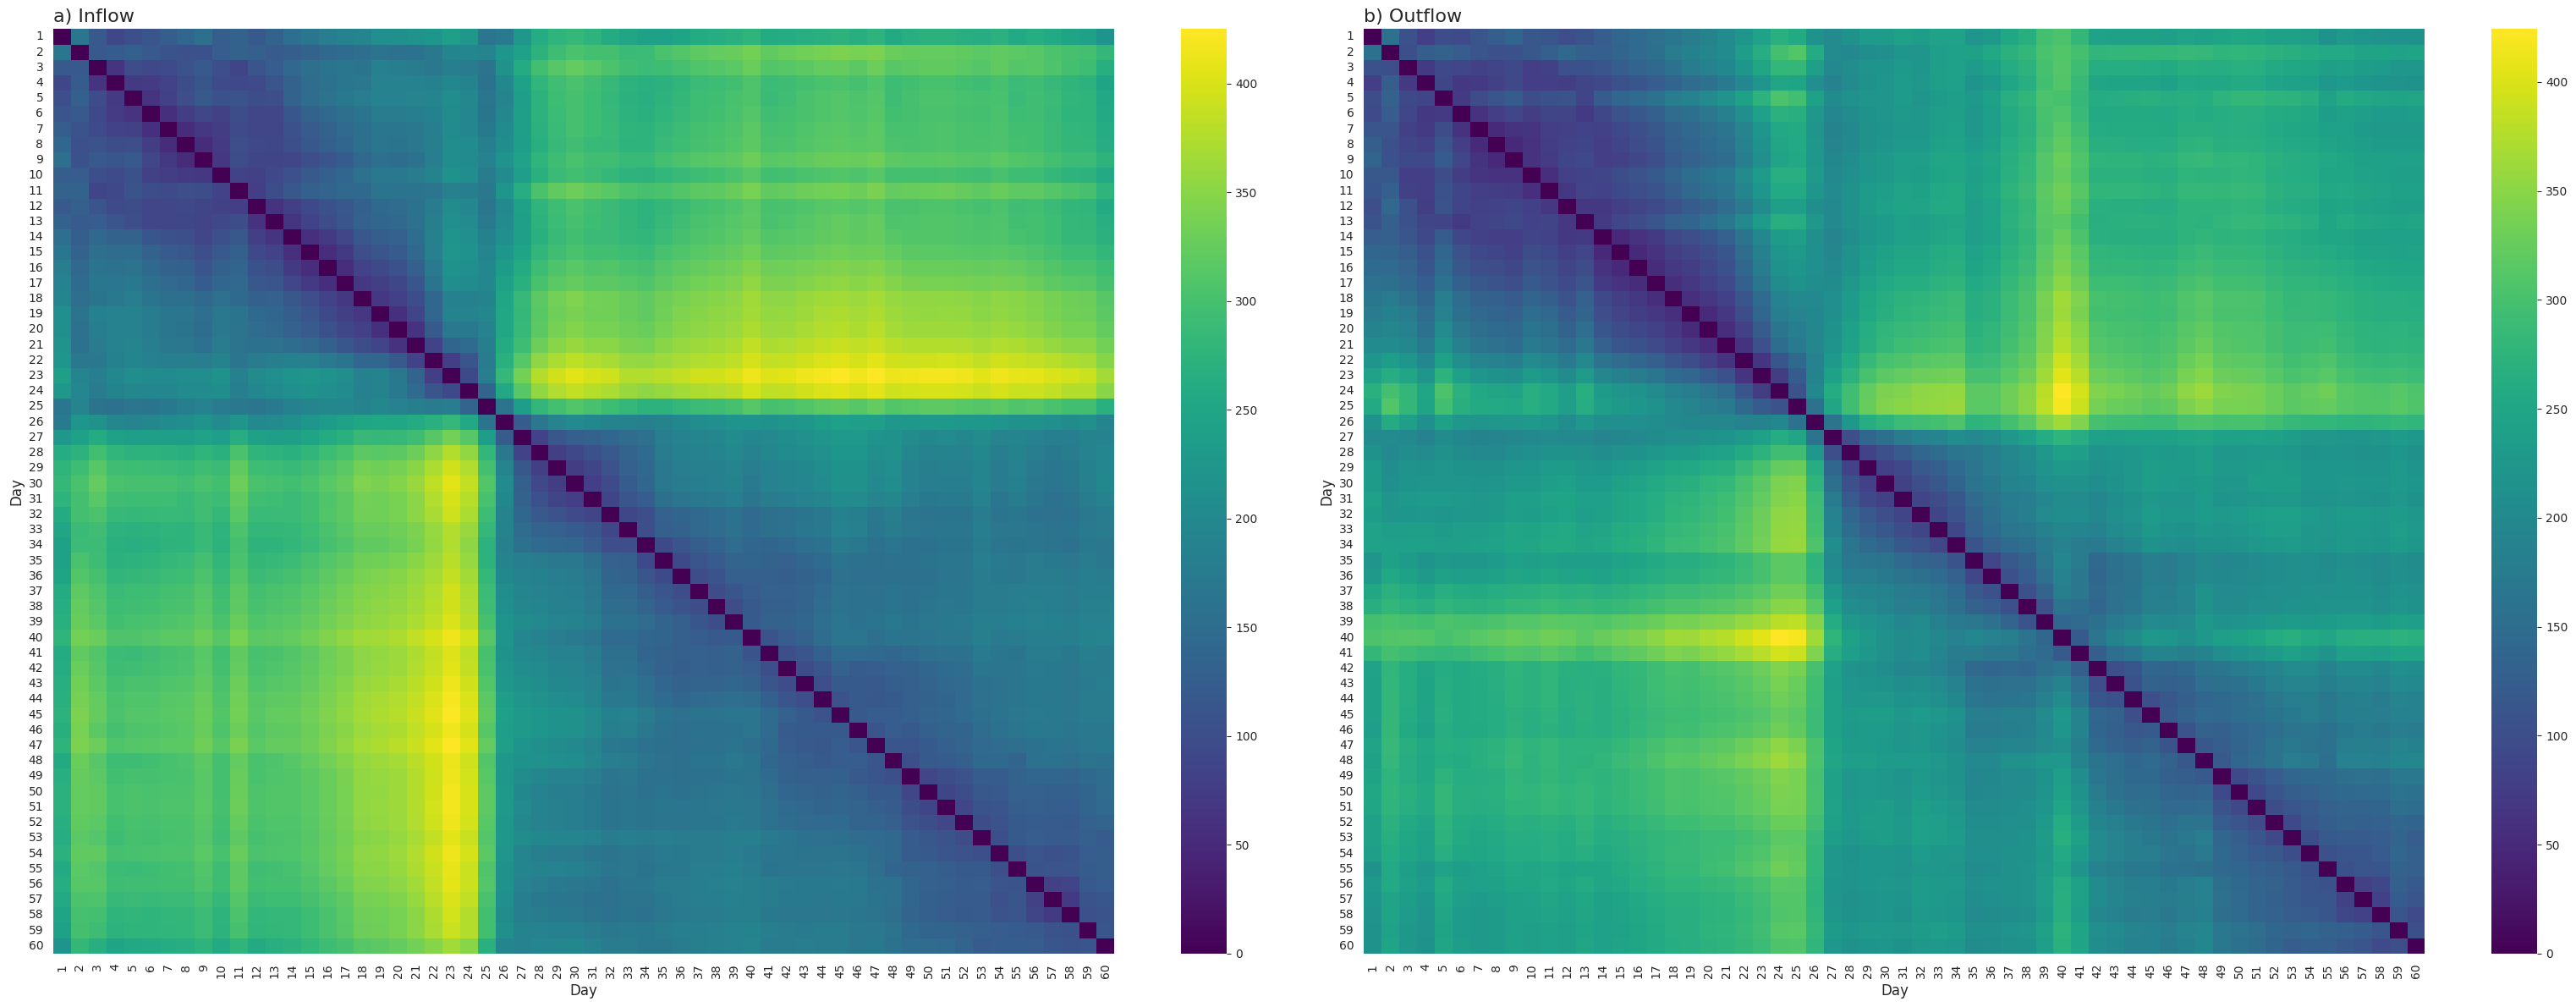

In [ ]:
# Calcular a norma de Frobenius entre as matrizes de adjacência ponderada
def calculate_frobenius_norms(matrix, all_matrices):
    norms = []
    for i in range(len(all_matrices)):
        norm = np.linalg.norm(matrix - all_matrices[i])
        norms.append(norm)
    return norms

# Calcular as normas de Frobenius para inflow e outflow em relação a todos os dias
inflow_frobenius_norms = []
outflow_frobenius_norms = []

for day in range(len(inflow_n)):
    inflow_norms = calculate_frobenius_norms(inflow_n[day], inflow_n)
    inflow_frobenius_norms.append(inflow_norms)

    outflow_norms = calculate_frobenius_norms(outflow_n[day], outflow_n)
    outflow_frobenius_norms.append(outflow_norms)

# Heatmap para inflow
plt.figure(figsize=(32, 12))
plt.subplot(1, 2, 1)
sns.heatmap(inflow_frobenius_norms, cmap='viridis')
plt.title('a) Inflow', fontsize=16, loc='left')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Ajuste dos eixos x e y para representar todos os dias
plt.xticks(np.arange(0.5, len(inflow_frobenius_norms)+0.5, 1), np.arange(1, len(inflow_frobenius_norms)+1, 1))
plt.yticks(np.arange(0.5, len(inflow_frobenius_norms)+0.5, 1), np.arange(1, len(inflow_frobenius_norms)+1, 1))
plt.tick_params(axis='both', which='both', width=1.5, length=5)

# Heatmap para outflow
plt.subplot(1, 2, 2)
sns.heatmap(outflow_frobenius_norms, cmap='viridis')
plt.title('b) Outflow', fontsize=16, loc='left')
plt.xlabel('Day', fontsize=12)
plt.ylabel('Day', fontsize=12)

# Ajuste dos eixos x e y para representar todos os dias
plt.xticks(np.arange(0.5, len(outflow_frobenius_norms)+0.5, 1), np.arange(1, len(outflow_frobenius_norms)+1, 1))
plt.yticks(np.arange(0.5, len(outflow_frobenius_norms)+0.5, 1), np.arange(1, len(outflow_frobenius_norms)+1, 1))
plt.tick_params(axis='both', which='both', width=1.5, length=5)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/data_IC/comparing_OD_matrices_in_out/heatmap_normalized_data.pdf')
plt.show()

# Visualizing the (in/out) networks per day

## Auxiliary functions

In [ ]:
def get_nets_filenames():
  # Specify the directory
  directory = '/content/drive/MyDrive/data_IC/networks/'

  # List all files and directories in the specified directory
  files_and_dirs = os.listdir(directory)
  files = [f for f in files_and_dirs if os.path.isfile(os.path.join(directory, f))]
  sorted_files = sorted(files)
  return sorted_files

def process_filename(filename):
    pattern = re.compile(r'(\w+)_(in|out)_(\d{8})')

    match = pattern.match(filename.split('.')[0])
    if match:
        source, direction, date_str = match.groups()
        date = time.strptime(date_str, '%Y%m%d')
        formatted_date = time.strftime('%Y-%m-%d', date)
        return source, direction, formatted_date

def get_networks_plot(net_name, info):
  source, direction, formatted_date = info

  # Reading the network from file
  G = nx.read_graphml('/content/drive/My Drive/data_IC/networks/' + net_name + '.GraphML')

  # Setting up node labels
  labels = {node: G.nodes[node]['City_EN'] for node in G.nodes()}
  nx.set_node_attributes(G, labels, 'label')

  # Some calculations for plot dimensions
  xcoords = np.array([G.nodes[node]["xcoord"] for node in G.nodes()])
  ycoords = np.array([G.nodes[node]["ycoord"] for node in G.nodes()])

  dim_x = xcoords.max() - xcoords.min()
  dim_y = ycoords.max() - ycoords.min()
  scale = 25.0
  width = dim_x * scale
  height = dim_y * scale

  metrics = ['betweenness_weight']

  # Order nodes according to the provided list
  node_order = [f'n{i}' for i in range(len(G.nodes()))]

  # Read metrics files and update node attributes
  for metric in metrics:
      df = pd.read_csv(f'/content/drive/MyDrive/data_IC/metrics/{net_name}/metrics/' + f'{metric}' + '.csv', delimiter=';', header=None)
      df.columns = ['id', 'city_code', 'metric']
      metric_values = dict(zip(node_order, df['metric'].values.tolist()))
      nx.set_node_attributes(G, metric_values, metric)

  # Set initial size for all nodes and increase size
  nx.set_node_attributes(G, 40, 'size')

  # Define layout
  layout = {node: (G.nodes[node]['xcoord'], G.nodes[node]['ycoord']) for node in G.nodes()}

  # Update node attributes
  for node in G.nodes():
      if G.nodes[node]['label'] not in ["Wuhan", "Beijing"]:
          G.nodes[node]['label'] = ""
          G.nodes[node]['vertex_shape'] = "o"
      else:
          G.nodes[node]['vertex_shape'] = "^"
          G.nodes[node]['size'] = 80

  # Normalize metrics for plotting
  for metric in metrics:
      metric_values = np.array([G.nodes[node][metric] for node in G.nodes()])
      # Apply Min-Max normalization
      normalized_values = (metric_values - np.min(metric_values)) / (np.max(metric_values) - np.min(metric_values))
      node_attribute_dict = dict(zip(G.nodes(), normalized_values))
      nx.set_node_attributes(G, node_attribute_dict, 'metric_plt')

  # Set vertex colors
  cmap1 = LinearSegmentedColormap.from_list('gr',["g", "y", "r"], N=303)
  for node in G.nodes():
      G.nodes[node]['color'] = cmap1(G.nodes[node]['metric_plt'])

  # Set edge colors and widths with opacity
  edge_weights = np.array([G.edges[edge].get('weight', 1.0) for edge in G.edges()])
  scaled_weights = np.interp(edge_weights, (edge_weights.min(), edge_weights.max()), (0, 1))
  for edge, weight_plt in zip(G.edges(), scaled_weights):
      G.edges[edge]['weight_plt'] = weight_plt
      G.edges[edge]['edge_width'] = weight_plt * 4  # Adjust the multiplier for desired width scale
      rgba_color = list(cmap1(weight_plt))
      G.edges[edge]['color'] = rgba_color

  # Plotting
  pos = layout
  vertex_shapes = {node: G.nodes[node]['vertex_shape'] for node in G.nodes()}
  vertex_colors = {node: G.nodes[node]['color'] for node in G.nodes()}
  vertex_sizes = {node: G.nodes[node]['size'] for node in G.nodes()}
  edge_colors = [G.edges[edge]['color'] for edge in G.edges()]
  edge_widths = [G.edges[edge]['edge_width'] for edge in G.edges()]

  fig, ax = plt.subplots(figsize=(width / 100, height / 100))

  # Draw edges
  nx.draw_networkx_edges(G, pos, ax=ax, edge_color=edge_colors, width=edge_widths, arrows=False, alpha=0.95)

  # Draw nodes with different shapes
  shapes = set(vertex_shapes.values())
  for shape in shapes:
      nodes_with_shape = [node for node in G.nodes() if G.nodes[node]['vertex_shape'] == shape]
      nx.draw_networkx_nodes(
          G, pos, ax=ax, nodelist=nodes_with_shape, node_color=[vertex_colors[node] for node in nodes_with_shape],
          node_size=[vertex_sizes[node] for node in nodes_with_shape], node_shape=shape, edgecolors='black'
      )

  # Draw labels for specific nodes
  labels = {node: G.nodes[node]['label'] for node in G.nodes() if G.nodes[node]['label']}
  label_positions = {node: (pos[node][0], pos[node][1] - 1.0) for node in labels}  # Adjust the y-coordinate

  nx.draw_networkx_labels(
      G, label_positions, labels=labels, font_size=10, font_color='white', font_weight='bold'
  )

  # Add colorbar
  sm = plt.cm.ScalarMappable(cmap=cmap1, norm=plt.Normalize(vmin=0, vmax=1))
  sm.set_array([])
  cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.07)
  cbar.set_label('Points represent cities centroids, and edges represent the flow of people between cities.\n Edge colors and widths are the flow intensities. Node colors are the weighted betweenness.\n Higher values are in red and lower in green.')
  cbar.ax.tick_params(labelsize=9.5)

  # Set title
  plt.suptitle(f'{source.capitalize()} mobility data - {direction.capitalize()}flow: {formatted_date}', fontsize=18)

  # Adjust margins
  plt.margins(x=0.1, y=0.1)
  plt.box(False)

  plt.savefig(f'/content/drive/MyDrive/data_IC/output/{direction}flow/{net_name}.png', dpi=450)
  plt.close(fig)

def create_flows_gif():
    direction = ['in', 'out']

    for d in direction:
      flow_dir = f'/content/drive/MyDrive/data_IC/output/{d}flow/'
      output_gif = f'/content/drive/MyDrive/data_IC/output/animations/{d}flow.gif'

      # Get the list of PNG files in the directory
      filenames = sorted([f for f in os.listdir(flow_dir) if f.endswith('.png')])

      # Filter the files to ensure they belong to the inflow category
      flow_files = [f for f in filenames if re.search(r'(in|out)_\d{8}\.png', f)]

      # Sort files based on the date in the filename
      flow_files = sorted(flow_files, key=lambda x: re.search(r'\d{8}', x).group())

      images = []

      for filename in flow_files:
          file_path = os.path.join(flow_dir, filename)
          images.append(Image.open(file_path))

      # Save the images as a GIF
      images[0].save(
          output_gif,
          save_all=True,
          append_images=images[1:],
          duration=850,  # Duration between frames in milliseconds
          loop=0  # Loop forever
      )

## Getting the networks .png and .gif

In [ ]:
for filename in get_nets_filenames():
  info = process_filename(filename)
  get_networks_plot(filename.split('.')[0], info)


create_flows_gif()


# Metrics evolution - Raw data

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/avg_betweenness_raw.pkl', 'rb') as file:
  betweenness = pk.load(file)

inflow_betweenness, outflow_betweenness = betweenness

inflow_betweenness = list(inflow_betweenness)
outflow_betweenness = list(outflow_betweenness)

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/avg_closeness_raw.pkl', 'rb') as file:
  closeness = pk.load(file)

inflow_closeness, outflow_closeness = closeness

inflow_closeness = list(inflow_closeness)
outflow_closeness = list(outflow_closeness)

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/avg_diameter_raw.pkl', 'rb') as file:
  diameter = pk.load(file)

inflow_diameter, outflow_diameter = diameter

inflow_diameter = list(inflow_diameter)
outflow_diameter = list(outflow_diameter)

In [ ]:
def normalize_metrics(metrics, period):
    min_value = min(metrics[:period])
    max_value = max(metrics[:period])

    normalized_metrics = [(metric - min_value) / (max_value - min_value) for metric in metrics]

    return normalized_metrics

# Normalizar métricas
inflow_betweenness_normalized = normalize_metrics(inflow_betweenness, len(inflow_betweenness))
outflow_betweenness_normalized = normalize_metrics(outflow_betweenness, len(outflow_betweenness))
inflow_closeness_normalized = normalize_metrics(inflow_closeness, len(inflow_closeness))
outflow_closeness_normalized = normalize_metrics(outflow_closeness, len(outflow_closeness))
inflow_diameter_normalized = normalize_metrics(inflow_diameter, len(inflow_diameter))
outflow_diameter_normalized = normalize_metrics(outflow_diameter, len(outflow_diameter))

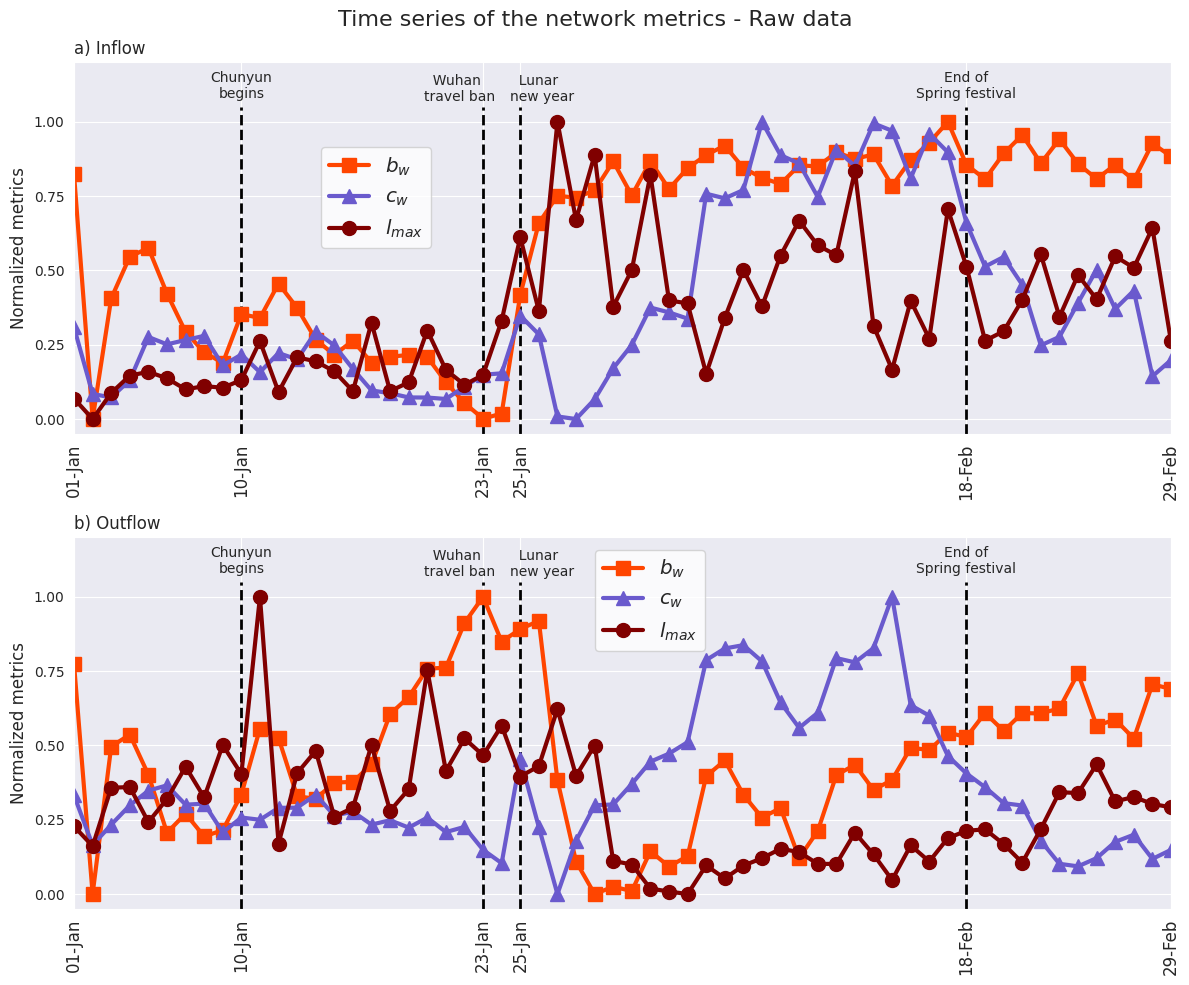

In [ ]:
# Função para formatar números em float
def float_formatter(x, pos):
    return f"{x:.2f}"

# Criar subplots
fig, (ax_inflow, ax_outflow) = plt.subplots(2, 1, figsize=(12, 10))

fig.suptitle('Time series of the network metrics - Raw data', fontsize=16)

# Gerar array de dias no formato de string (01-jan até 29-fev)
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 2, 29)
delta = timedelta(days=1)
path_directories = [(start_date + i * delta).strftime("%d-%b") for i in range((end_date - start_date).days + 1)]

# Selecionar apenas os dias específicos para rótulos
selected_days = [1, 10, 23, 25, 49, 60]
selected_days_aux = selected_days[1:-1]
selected_labels = [path_directories[i-1] for i in selected_days]
selected_labels_aux = ['Chunyun\nbegins', '  Wuhan\ntravel ban', '  Lunar\nnew year', 'End of\nSpring festival']
days = np.arange(1, inflow.shape[0] + 1)

# Configurações do gráfico Inflow
ax_inflow.yaxis.set_major_formatter(FuncFormatter(float_formatter))
ax_inflow.set_title('a) Inflow', loc='left')

# Marcar os períodos festivos
ax_inflow.vlines(10, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_inflow.vlines(23, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_inflow.vlines(25, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_inflow.vlines(49, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)

# Adicionar nome dos dias festivos
for day, label in zip(selected_days_aux, selected_labels_aux):
    ha = 'center'
    va = 'bottom'
    xy = (day, 1.07)
    if label == '  Wuhan\ntravel ban':
        xy = (day - 3.2, 1.07)
        ax_inflow.annotate(label, xy=xy, fontsize=10)
    elif label == '  Lunar\nnew year':
        xy = (day - .525, 1.07)
        ax_inflow.annotate(label, xy=xy, fontsize=10)
    else:
        ax_inflow.annotate(label, xy=xy, ha=ha, va=va, fontsize=10)

ax_inflow.set_xlim([1, 60])
ax_inflow.set_ylim([-0.05, 1.2])
ax_inflow.set_yticks(np.arange(0, 1.25, 0.25))  # Configurar ticks do eixo y
ax_inflow.set_xticks(selected_days)
ax_inflow.set_xticklabels(selected_labels, fontsize=12, rotation=90, ha='center')
ax_inflow.set_ylabel('Normalized metrics', fontsize=12)

# Plotar gráfico de evolução temporal para Inflow
ax_inflow.plot(days, inflow_betweenness_normalized, label=r'$b_{w}$', marker='s', color='orangered', markersize=10, lw=3)
ax_inflow.plot(days, inflow_closeness_normalized, label=r'$c_{w}$', marker='^', color='slateblue', markersize=10, lw=3)
ax_inflow.plot(days, inflow_diameter_normalized, label=r'$l_{max}$', marker='o', color='maroon', markersize=10, lw=3)

# Adicionar legenda
ax_inflow.legend(facecolor='white', fontsize='x-large', loc=(0.225, 0.5))
ax_inflow.grid(True)

# Configurações do gráfico Outflow
ax_outflow.yaxis.set_major_formatter(FuncFormatter(float_formatter))
ax_outflow.set_title('b) Outflow', loc='left')

# Marcar os períodos festivos
ax_outflow.vlines(10, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_outflow.vlines(23, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_outflow.vlines(25, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_outflow.vlines(49, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)

# Adicionar nome dos dias festivos
for day, label in zip(selected_days_aux, selected_labels_aux):
    ha = 'center'
    va = 'bottom'
    xy = (day, 1.07)
    if label == '  Wuhan\ntravel ban':
        xy = (day - 3.2, 1.07)
        ax_outflow.annotate(label, xy=xy, fontsize=10)
    elif label == '  Lunar\nnew year':
        xy = (day - .525, 1.07)
        ax_outflow.annotate(label, xy=xy, fontsize=10)
    else:
        ax_outflow.annotate(label, xy=xy, ha=ha, va=va, fontsize=10)

ax_outflow.set_xlim([1, 60])
ax_outflow.set_ylim([-0.05, 1.2])
ax_outflow.set_yticks(np.arange(0, 1.25, 0.25))  # Configurar ticks do eixo y
ax_outflow.set_xticks(selected_days)
ax_outflow.set_xticklabels(selected_labels, fontsize=12, rotation=90, ha='center')
ax_outflow.set_ylabel('Normalized metrics', fontsize=12)

# Plotar gráfico de evolução temporal para Outflow
ax_outflow.plot(days, outflow_betweenness_normalized, label=r'$b_{w}$', marker='s', color='orangered', markersize=10, lw=3)
ax_outflow.plot(days, outflow_closeness_normalized, label=r'$c_{w}$', marker='^', color='slateblue', markersize=10, lw=3)
ax_outflow.plot(days, outflow_diameter_normalized, label=r'$l_{max}$', marker='o', color='maroon', markersize=10, lw=3)

# Adicionar legenda
ax_outflow.legend(facecolor='white', fontsize='x-large', loc=(0.475, 0.695))
ax_outflow.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.savefig('/content/drive/MyDrive/data_IC/metrics_evolution/temporal_evolution_network_metrics_raw_data.pdf')
plt.show()

# Flow evolution

A substantial increase in population flow was observed a few days before the start of the chunyun migration. Average cross-city daily movements increased from 107.06 million in normal times to 125.83 million for chunyun, from 10 to 23 January. The flow was followed by a sharp drop beginning on 23 January, when lockdown measures were implemented in Wuhan, with all public transport, including buses, railways, flights and ferry services, being suspended. With travel restrictions immediately adopted in other provinces following the Wuhan travel ban, this reduction was sustained for almost three weeks in China: the population flow reached the minimum level (29.15 million) on 15 February, dropping to nearly a quarter of the population flow of 22 January (124.87 million). From 24 January to 29 February, there were ∼45.05 million cross-city movements each day, on average, which was less than half of that on 22 January. After returning to work, the population flow did not return to previous levels, even at the end of the study period.

Link: https://academic.oup.com/nsr/article/8/11/nwab148/6352969

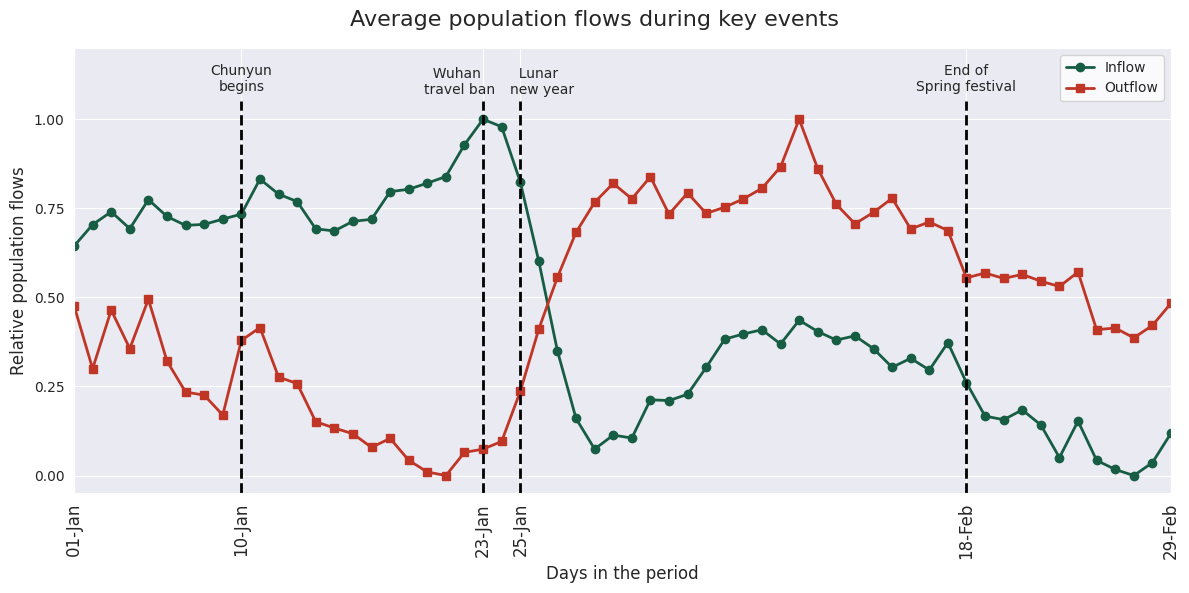

In [ ]:
cmap = load_cmap('Homer2')

# Função para calcular a média dos fluxos para todos os nós
def calculate_average_flow(inflow, outflow):
    average_inflow = np.mean(inflow, axis=(1, 2))
    average_outflow = np.mean(outflow, axis=(1, 2))
    return average_inflow, average_outflow

# Função para normalizar os fluxos médios entre 0 e 1
def normalize_flux(average_flux):
    min_value = np.min(average_flux)
    max_value = np.max(average_flux)
    normalized_flux = (average_flux - min_value) / (max_value - min_value)
    return normalized_flux

# Chama a função para calcular a média dos fluxos
average_inflow, average_outflow = calculate_average_flow(inflow, outflow)

# Gerar array de dias no formato de string (01-jan até 29-fev)
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 2, 29)
delta = timedelta(days=1)
path_directories = [(start_date + i * delta).strftime("%d-%b") for i in range((end_date - start_date).days + 1)]

# Selecionar apenas os dias específicos para rótulos
selected_days = [1, 10, 23, 25, 49, 60]
selected_days_aux = selected_days[1:-1]
selected_labels = [path_directories[i-1] for i in selected_days]
selected_labels_aux = ['Chunyun\nbegins', '  Wuhan\ntravel ban', '  Lunar\nnew year', 'End of\nSpring festival']
days = np.arange(1, inflow.shape[0] + 1)

# Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Average population flows during key events", fontsize=16)

# Normaliza os fluxos médios
normalized_inflow = normalize_flux(average_inflow)
normalized_outflow = normalize_flux(average_outflow)

# Configurações do gráfico
ax.set_ylabel('Relative population flows', fontsize=12)
ax.set_xlabel('Days in the period', fontsize=12)
ax.set_xlim([1, 60])
ax.set_ylim([-0.05, 1.2])
ax.set_yticks(np.arange(0, 1.25, 0.25))
ax.set_xticks(selected_days)
ax.set_xticklabels(selected_labels, fontsize=12, rotation=90, ha='center')

# Plotar os fluxos médios
ax.plot(np.arange(1, 61), normalized_inflow, linewidth=2, color=cmap.colors[-1], marker='o', label='Inflow')
ax.plot(np.arange(1, 61), normalized_outflow, linewidth=2, color=cmap.colors[0], marker='s', label='Outflow')

# Marcar os períodos festivos
ax.vlines(10, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax.vlines(23, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax.vlines(25, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax.vlines(49, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)

# Adicionar nome dos dias festivos
for day, label in zip(selected_days_aux, selected_labels_aux):
    ha = 'center'
    va = 'bottom'
    xy = (day, 1.07)
    if label == '  Wuhan\ntravel ban':
        xy = (day - 3.2, 1.07)
        ax.annotate(label, xy=xy, fontsize=10)
    elif label == '  Lunar\nnew year':
        xy = (day - .525, 1.07)
        ax.annotate(label, xy=xy, fontsize=10)
    else:
        ax.annotate(label, xy=xy, ha=ha, va=va, fontsize=10)

# Adicionar legenda
ax.legend(facecolor='white')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/data_IC/metrics_evolution/avg_pop_flows.pdf')
plt.show()

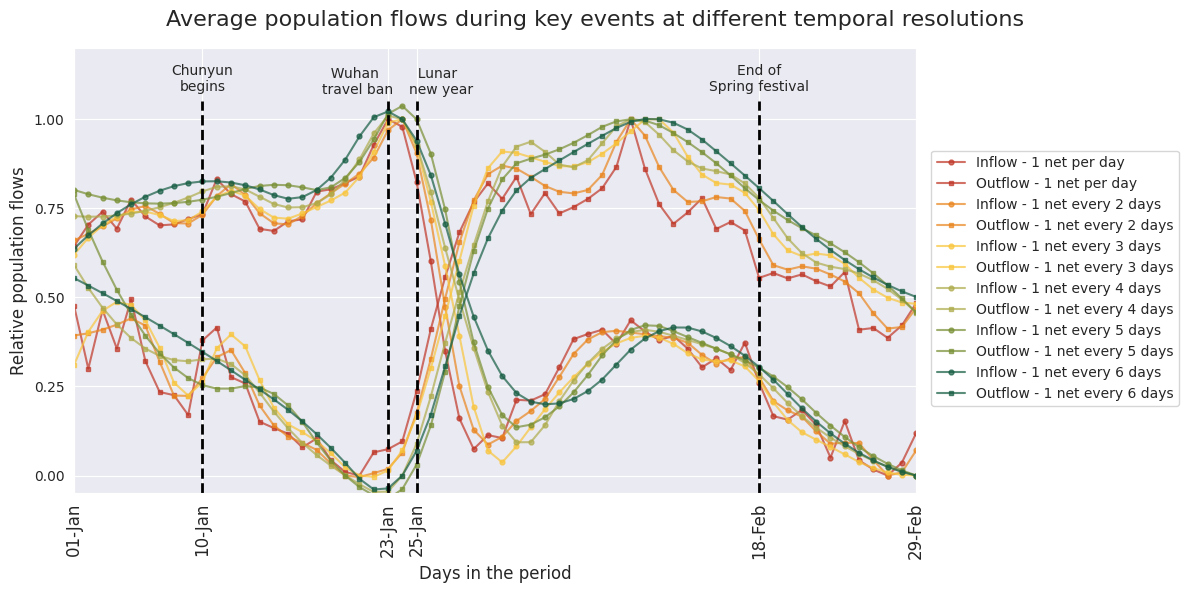

In [ ]:
# Function to calculate the average flows
def calculate_average_flow(inflow, outflow):
    average_inflow = np.mean(inflow, axis=(1, 2))
    average_outflow = np.mean(outflow, axis=(1, 2))
    return average_inflow, average_outflow

# Function to normalize the flows between 0 and 1
def normalize_flux(average_flux):
    min_value = np.min(average_flux)
    max_value = np.max(average_flux)
    normalized_flux = (average_flux - min_value) / (max_value - min_value)
    return normalized_flux

# Function to aggregate data based on the given resolution
def aggregate_data(data, resolution):
    num_days = data.shape[0]
    num_aggregated_days = num_days // resolution
    aggregated_data = np.array([np.mean(data[i * resolution:(i + 1) * resolution], axis=0) for i in range(num_aggregated_days)])
    return aggregated_data

# List of resolutions to consider (in days)
resolutions = [1, 2, 3, 4, 5, 6]
labels = [f'1 net every {x} days' for x in range(1, 7)]
labels[0] = '1 net per day'

# Calculate and normalize the average flows for each resolution
normalized_inflows = []
normalized_outflows = []
for resolution in resolutions:
    inflow_aggregated = aggregate_data(inflow, resolution)
    outflow_aggregated = aggregate_data(outflow, resolution)

    average_inflow, average_outflow = calculate_average_flow(inflow_aggregated, outflow_aggregated)

    normalized_inflow = normalize_flux(average_inflow)
    normalized_outflow = normalize_flux(average_outflow)

    normalized_inflows.append(normalized_inflow)
    normalized_outflows.append(normalized_outflow)

# Generate array of days in string format (01-Jan to 29-Feb)
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 2, 29)
delta = timedelta(days=1)
path_directories = [(start_date + i * delta).strftime("%d-%b") for i in range((end_date - start_date).days + 1)]

# Select specific days for labels
selected_days = [1, 10, 23, 25, 49, 60]
selected_days_aux = selected_days[1:-1]
selected_labels = [path_directories[i-1] for i in selected_days]
selected_labels_aux = ['Chunyun\nbegins', '  Wuhan\ntravel ban', '  Lunar\nnew year', 'End of\nSpring festival']
days = np.arange(1, inflow.shape[0] + 1)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle("Average population flows during key events at different temporal resolutions", fontsize=16)

# Plotting the normalized flows for each resolution
for idx, resolution in enumerate(resolutions):
    num_points = len(normalized_inflows[idx])
    original_days = np.arange(resolution, num_points * resolution + 1, resolution)
    interpolated_days = np.linspace(1, 60, 60)

    # Interpolating the data to match the full range of days
    interp_inflow = interp1d(original_days, normalized_inflows[idx], kind='quadratic', fill_value="extrapolate")
    interp_outflow = interp1d(original_days, normalized_outflows[idx], kind='quadratic', fill_value="extrapolate")

    # Plot inflow and outflow for each resolution using the same color
    ax.plot(interpolated_days, interp_inflow(interpolated_days), label=f'Inflow - {labels[idx]}', marker='o', markersize=3.5, color=cmap.colors[idx], alpha=.7)
    ax.plot(interpolated_days, interp_outflow(interpolated_days), label=f'Outflow - {labels[idx]}', marker='s', markersize=3.5, color=cmap.colors[idx], alpha=.7)

# Mark the key event periods
ax.vlines(10, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax.vlines(23, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax.vlines(25, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax.vlines(49, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)

# Add labels for key events
for day, label in zip(selected_days_aux, selected_labels_aux):
    ha = 'center'
    va = 'bottom'
    xy = (day, 1.07)
    if label == '  Wuhan\ntravel ban':
        xy = (day - 4.6, 1.07)
        ax.annotate(label, xy=xy, fontsize=10)
    elif label == '  Lunar\nnew year':
        xy = (day - .5, 1.07)
        ax.annotate(label, xy=xy, fontsize=10)
    else:
        ax.annotate(label, xy=xy, ha=ha, va=va, fontsize=10)

# Set plot configurations
ax.set_ylabel('Relative population flows', fontsize=12)
ax.set_xlabel('Days in the period', fontsize=12)
ax.set_xlim([1, 60])
ax.set_ylim([-0.05, 1.2])
ax.set_yticks(np.arange(0, 1.25, 0.25))
ax.set_xticks(selected_days)
ax.set_xticklabels(selected_labels, fontsize=12, rotation=90, ha='center')

# Add legend
ax.legend(facecolor='white', bbox_to_anchor=(1.01, .785), loc='upper left')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/data_IC/metrics_evolution/avg_pop_flows_temporal_resolutions.pdf')
plt.show()

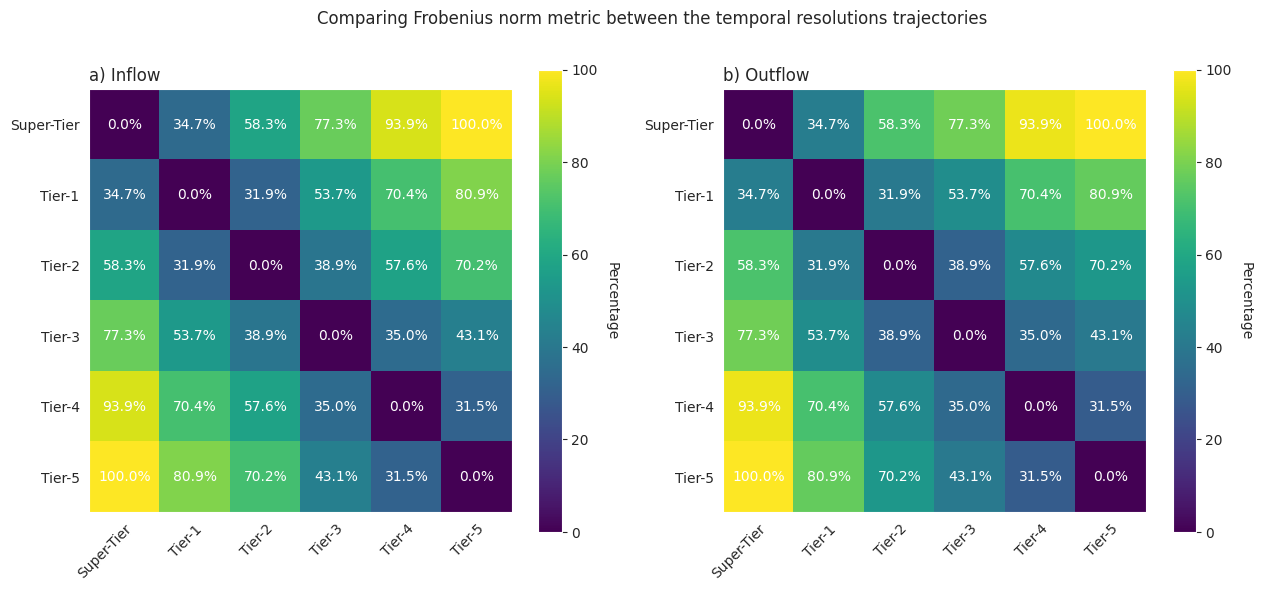

In [ ]:
# Função para calcular a norma de Frobenius
def frobenius_norm(matrix):
    return np.linalg.norm(matrix)

# Função para calcular as normas de Frobenius entre pares de trajetórias
def calculate_frobenius_norms(tier_data):
    num_tiers = len(tier_data)
    frobenius_norms = np.zeros((num_tiers, num_tiers))
    for i in range(num_tiers):
        for j in range(num_tiers):
            frobenius_norms[i, j] = frobenius_norm(tier_data[i] - tier_data[j])
    return frobenius_norms

# Normaliza uma matriz e converte os valores em porcentagem
def normalize_and_convert_to_percentage(matrix):
    max_value = np.max(matrix)
    return (matrix / max_value) * 100

# Listas para armazenar as trajetórias de interp_inflow e interpolated_days para cada tier
interp_inflow_per_tier = []
interpolated_days_per_tier = []

# Listas para armazenar as trajetórias de interp_outflow e interpolated_days para cada tier
interp_outflow_per_tier = []

# Calcular e armazenar as trajetórias para cada tier
for idx, resolution in enumerate(resolutions):
    num_points = len(normalized_inflows[idx])
    original_days = np.arange(resolution, num_points * resolution + 1, resolution)
    interpolated_days = np.linspace(1, 60, 60)

    # Interpolando os dados para corresponder ao intervalo completo de dias
    interp_inflow = interp1d(original_days, normalized_inflows[idx], kind='linear', fill_value="extrapolate")
    interp_outflow = interp1d(original_days, normalized_outflows[idx], kind='linear', fill_value="extrapolate")

    # Armazenar as trajetórias de inflow e outflow para cada tier
    interp_inflow_per_tier.append(interp_inflow(interpolated_days))  # Avaliar a função interp_inflow nos dias interpolados
    interp_outflow_per_tier.append(interp_outflow(interpolated_days))  # Avaliar a função interp_outflow nos dias interpolados

    # Armazenar as trajetórias de dias interpolados para cada tier
    interpolated_days_per_tier.append(interpolated_days)

# Calcular as normas de Frobenius entre pares de trajetórias para inflow
frobenius_norms_inflow = calculate_frobenius_norms(interp_inflow_per_tier)

# Calcular as normas de Frobenius entre pares de trajetórias para outflow
frobenius_norms_outflow = calculate_frobenius_norms(interp_outflow_per_tier)

# Normalizar os valores e converter em porcentagem
frobenius_norms_inflow_percentage = normalize_and_convert_to_percentage(frobenius_norms_inflow)
frobenius_norms_outflow_percentage = normalize_and_convert_to_percentage(frobenius_norms_outflow)

tiers = ['Super-Tier', 'Tier-1', 'Tier-2', 'Tier-3', 'Tier-4', 'Tier-5']

# Plotar o heatmap para inflow
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

fig.suptitle('Comparing Frobenius norm metric between the temporal resolutions trajectories')

im1 = ax[0].imshow(frobenius_norms_inflow_percentage, cmap='viridis')

# Adicionar porcentagens em cada quadrado do heatmap
for i in range(len(tiers)):
    for j in range(len(tiers)):
        text = ax[0].text(j, i, f'{frobenius_norms_inflow_percentage[i, j]:.1f}%', ha='center', va='center', color='white')

ax[0].set_title('a) Inflow', loc='left')
ax[0].set_xticks(np.arange(len(tiers)))
ax[0].set_yticks(np.arange(len(tiers)))
ax[0].set_xticklabels(tiers, fontsize=10)
ax[0].set_yticklabels(tiers, fontsize=10)
plt.setp(ax[0].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax[0].grid(False)

cbar1 = fig.colorbar(im1, ax=ax[0])
cbar1.set_label('Percentage', rotation=270, labelpad=15)

# Plotar o heatmap para outflow
im2 = ax[1].imshow(frobenius_norms_outflow_percentage, cmap='viridis')

# Adicionar porcentagens em cada quadrado do heatmap
for i in range(len(tiers)):
    for j in range(len(tiers)):
        text = ax[1].text(j, i, f'{frobenius_norms_inflow_percentage[i, j]:.1f}%', ha='center', va='center', color='white')

ax[1].set_title('b) Outflow', loc='left')
ax[1].set_xticks(np.arange(len(tiers)))
ax[1].set_yticks(np.arange(len(tiers)))
ax[1].set_xticklabels(tiers, fontsize=10)
ax[1].set_yticklabels(tiers, fontsize=10)
plt.setp(ax[1].get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax[1].grid(False)

cbar2 = fig.colorbar(im2, ax=ax[1])
cbar2.set_label('Percentage', rotation=270, labelpad=15)

plt.savefig('/content/drive/MyDrive/data_IC/metrics_evolution/frobenius_norm_comparing_temporal_resolutions.pdf')
plt.show()

# Metrics evolution - Normalized data

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/avg_betweenness_normalized_data.pkl', 'rb') as file:
  betweenness_n = pk.load(file)

inflow_betweenness_n, outflow_betweenness_n = betweenness_n

inflow_betweenness_n = list(inflow_betweenness_n)
outflow_betweenness_n = list(outflow_betweenness_n)

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/avg_closeness_normalized_data.pkl', 'rb') as file:
  closeness_n = pk.load(file)

inflow_closeness_n, outflow_closeness_n = closeness_n

inflow_closeness_n = list(inflow_closeness_n)
outflow_closeness_n = list(outflow_closeness_n)

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/avg_diameter_normalized_data.pkl', 'rb') as file:
  diameter_n = pk.load(file)

inflow_diameter_n, outflow_diameter_n = diameter_n

inflow_diameter_n = list(inflow_diameter_n)
outflow_diameter_n = list(outflow_diameter_n)

In [ ]:
def normalize_metrics(metrics, period):
    min_value = min(metrics[:period])
    max_value = max(metrics[:period])

    normalized_metrics = [(metric - min_value) / (max_value - min_value) for metric in metrics]

    return normalized_metrics

# Normalizar métricas
inflow_betweenness_n_normalized = normalize_metrics(inflow_betweenness_n, len(inflow_betweenness_n))
outflow_betweenness_n_normalized = normalize_metrics(outflow_betweenness_n, len(outflow_betweenness_n))
inflow_closeness_n_normalized = normalize_metrics(inflow_closeness_n, len(inflow_closeness_n))
outflow_closeness_n_normalized = normalize_metrics(outflow_closeness_n, len(outflow_closeness_n))
inflow_diameter_n_normalized = normalize_metrics(inflow_diameter_n, len(inflow_diameter_n))
outflow_diameter_n_normalized = normalize_metrics(outflow_diameter_n, len(outflow_diameter_n))

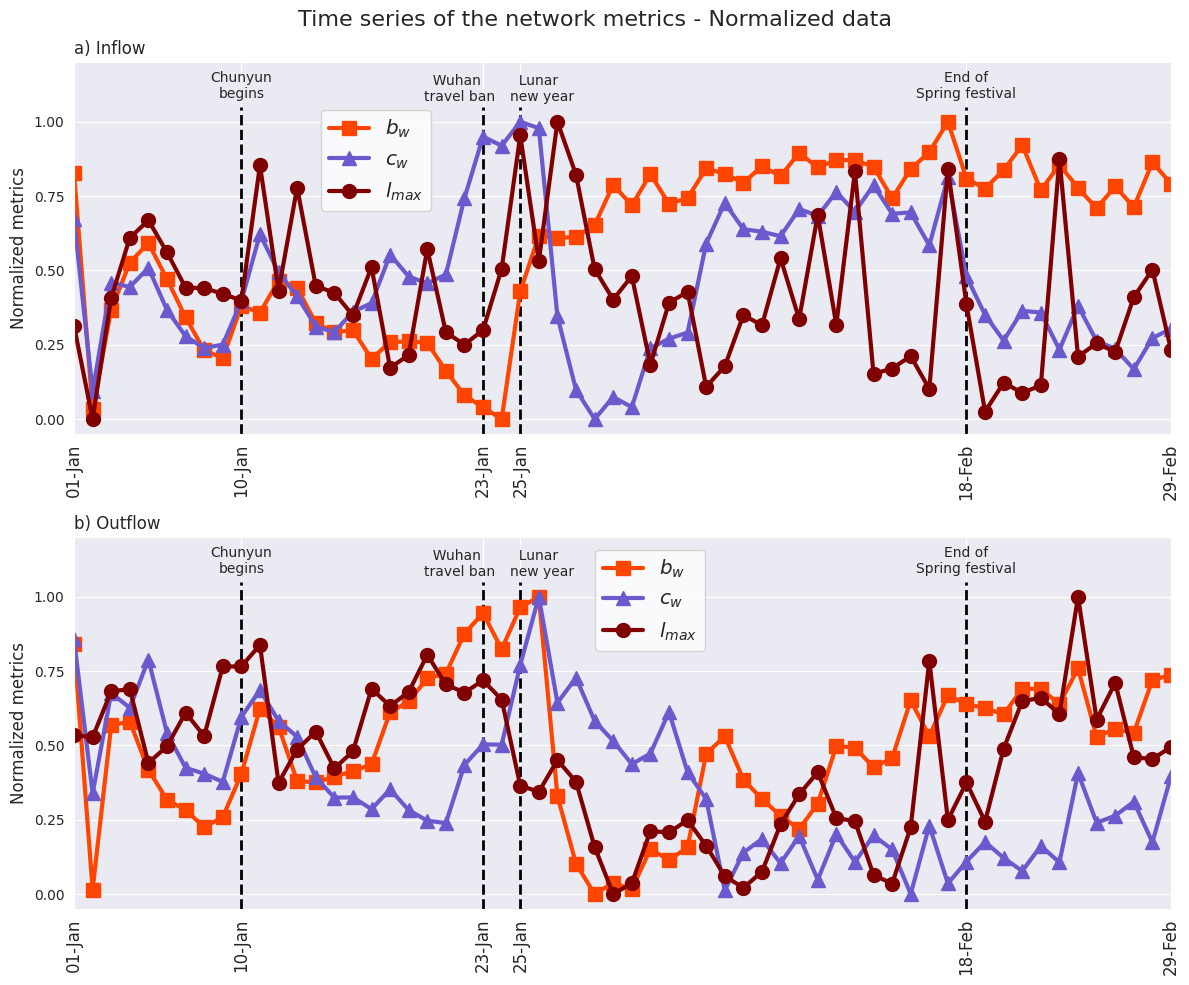

In [ ]:
# Função para formatar números em float
def float_formatter(x, pos):
    return f"{x:.2f}"

# Criar subplots
fig, (ax_inflow, ax_outflow) = plt.subplots(2, 1, figsize=(12, 10))

fig.suptitle('Time series of the network metrics - Normalized data', fontsize=16)

# Gerar array de dias no formato de string (01-jan até 29-fev)
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 2, 29)
delta = timedelta(days=1)
path_directories = [(start_date + i * delta).strftime("%d-%b") for i in range((end_date - start_date).days + 1)]

# Selecionar apenas os dias específicos para rótulos
selected_days = [1, 10, 23, 25, 49, 60]
selected_days_aux = selected_days[1:-1]
selected_labels = [path_directories[i-1] for i in selected_days]
selected_labels_aux = ['Chunyun\nbegins', '  Wuhan\ntravel ban', '  Lunar\nnew year', 'End of\nSpring festival']
days = np.arange(1, inflow.shape[0] + 1)

# Configurações do gráfico Inflow
ax_inflow.yaxis.set_major_formatter(FuncFormatter(float_formatter))
ax_inflow.set_title('a) Inflow', loc='left')

# Marcar os períodos festivos
ax_inflow.vlines(10, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_inflow.vlines(23, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_inflow.vlines(25, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_inflow.vlines(49, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)

# Adicionar nome dos dias festivos
for day, label in zip(selected_days_aux, selected_labels_aux):
    ha = 'center'
    va = 'bottom'
    xy = (day, 1.07)
    if label == '  Wuhan\ntravel ban':
        xy = (day - 3.2, 1.07)
        ax_inflow.annotate(label, xy=xy, fontsize=10)
    elif label == '  Lunar\nnew year':
        xy = (day - .525, 1.07)
        ax_inflow.annotate(label, xy=xy, fontsize=10)
    else:
        ax_inflow.annotate(label, xy=xy, ha=ha, va=va, fontsize=10)

ax_inflow.set_xlim([1, 60])
ax_inflow.set_ylim([-0.05, 1.2])
ax_inflow.set_yticks(np.arange(0, 1.25, 0.25))  # Configurar ticks do eixo y
ax_inflow.set_xticks(selected_days)
ax_inflow.set_xticklabels(selected_labels, fontsize=12, rotation=90, ha='center')
ax_inflow.set_ylabel('Normalized metrics', fontsize=12)

# Plotar gráfico de evolução temporal para Inflow
ax_inflow.plot(days, inflow_betweenness_n_normalized, label=r'$b_{w}$', marker='s', color='orangered', markersize=10, lw=3)
ax_inflow.plot(days, inflow_closeness_n_normalized, label=r'$c_{w}$', marker='^', color='slateblue', markersize=10, lw=3)
ax_inflow.plot(days, inflow_diameter_n_normalized, label=r'$l_{max}$', marker='o', color='maroon', markersize=10, lw=3)

# Adicionar legenda
ax_inflow.legend(facecolor='white', fontsize='x-large', loc=(0.225, 0.6))
ax_inflow.grid(True)

# Configurações do gráfico Outflow
ax_outflow.yaxis.set_major_formatter(FuncFormatter(float_formatter))
ax_outflow.set_title('b) Outflow', loc='left')

# Marcar os períodos festivos
ax_outflow.vlines(10, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_outflow.vlines(23, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_outflow.vlines(25, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)
ax_outflow.vlines(49, -0.05, 1.05, colors='black', linestyle='dashed', lw=2)

# Adicionar nome dos dias festivos
for day, label in zip(selected_days_aux, selected_labels_aux):
    ha = 'center'
    va = 'bottom'
    xy = (day, 1.07)
    if label == '  Wuhan\ntravel ban':
        xy = (day - 3.2, 1.07)
        ax_outflow.annotate(label, xy=xy, fontsize=10)
    elif label == '  Lunar\nnew year':
        xy = (day - .525, 1.07)
        ax_outflow.annotate(label, xy=xy, fontsize=10)
    else:
        ax_outflow.annotate(label, xy=xy, ha=ha, va=va, fontsize=10)

ax_outflow.set_xlim([1, 60])
ax_outflow.set_ylim([-0.05, 1.2])
ax_outflow.set_yticks(np.arange(0, 1.25, 0.25))  # Configurar ticks do eixo y
ax_outflow.set_xticks(selected_days)
ax_outflow.set_xticklabels(selected_labels, fontsize=12, rotation=90, ha='center')
ax_outflow.set_ylabel('Normalized metrics', fontsize=12)

# Plotar gráfico de evolução temporal para Outflow
ax_outflow.plot(days, outflow_betweenness_n_normalized, label=r'$b_{w}$', marker='s', color='orangered', markersize=10, lw=3)
ax_outflow.plot(days, outflow_closeness_n_normalized, label=r'$c_{w}$', marker='^', color='slateblue', markersize=10, lw=3)
ax_outflow.plot(days, outflow_diameter_n_normalized, label=r'$l_{max}$', marker='o', color='maroon', markersize=10, lw=3)

# Adicionar legenda
ax_outflow.legend(facecolor='white', fontsize='x-large', loc=(0.475, 0.695))
ax_outflow.grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.savefig('temporal_evolution_network_metrics_normalized_data.pdf')
plt.show()

# Nodewise Analysis - Normalized data

https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html

Eigenvector centrality computes the centrality for a node by adding the centrality of its predecessors. The centrality for node $i$ is the $i$-th element of a left eigenvector associated with the eigenvalue $\lambda$
 of maximum modulus that is positive. Such an eigenvector is defined up to a multiplicative constant by the equation

 $$\large \lambda x^T = x^T A,$$

 where $A$ is the adjacency matrix of the graph $G$. By definition of row-column product, the equation above is equivalent to

 $$\large \lambda x_i = \sum_{j\to i}x_j$$



In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/eigenvector_centrality_normalized_data.pkl', 'rb') as file:
  eigenvector_centrality_n = pk.load(file)

inflow_eigenvector_centrality_n, outflow_eigenvector_centrality_n = eigenvector_centrality_n

def normalize_metrics(metrics, period):
    normalized_metrics = []

    for node_metrics in metrics:
        min_value = min(node_metrics[:period])
        max_value = max(node_metrics[:period])

        # Clip values during normalization
        normalized_node_metrics = [
            np.clip((metric - min_value) / max(1e-6, max_value - min_value), 0.0, 1.0)
            for metric in node_metrics
        ]
        normalized_metrics.append(normalized_node_metrics)

    return normalized_metrics

inflow_eigenvector_centrality_nn = normalize_metrics(inflow_eigenvector_centrality_n, len(inflow_eigenvector_centrality_n))
outflow_eigenvector_centrality_nn = normalize_metrics(outflow_eigenvector_centrality_n, len(outflow_eigenvector_centrality_n))

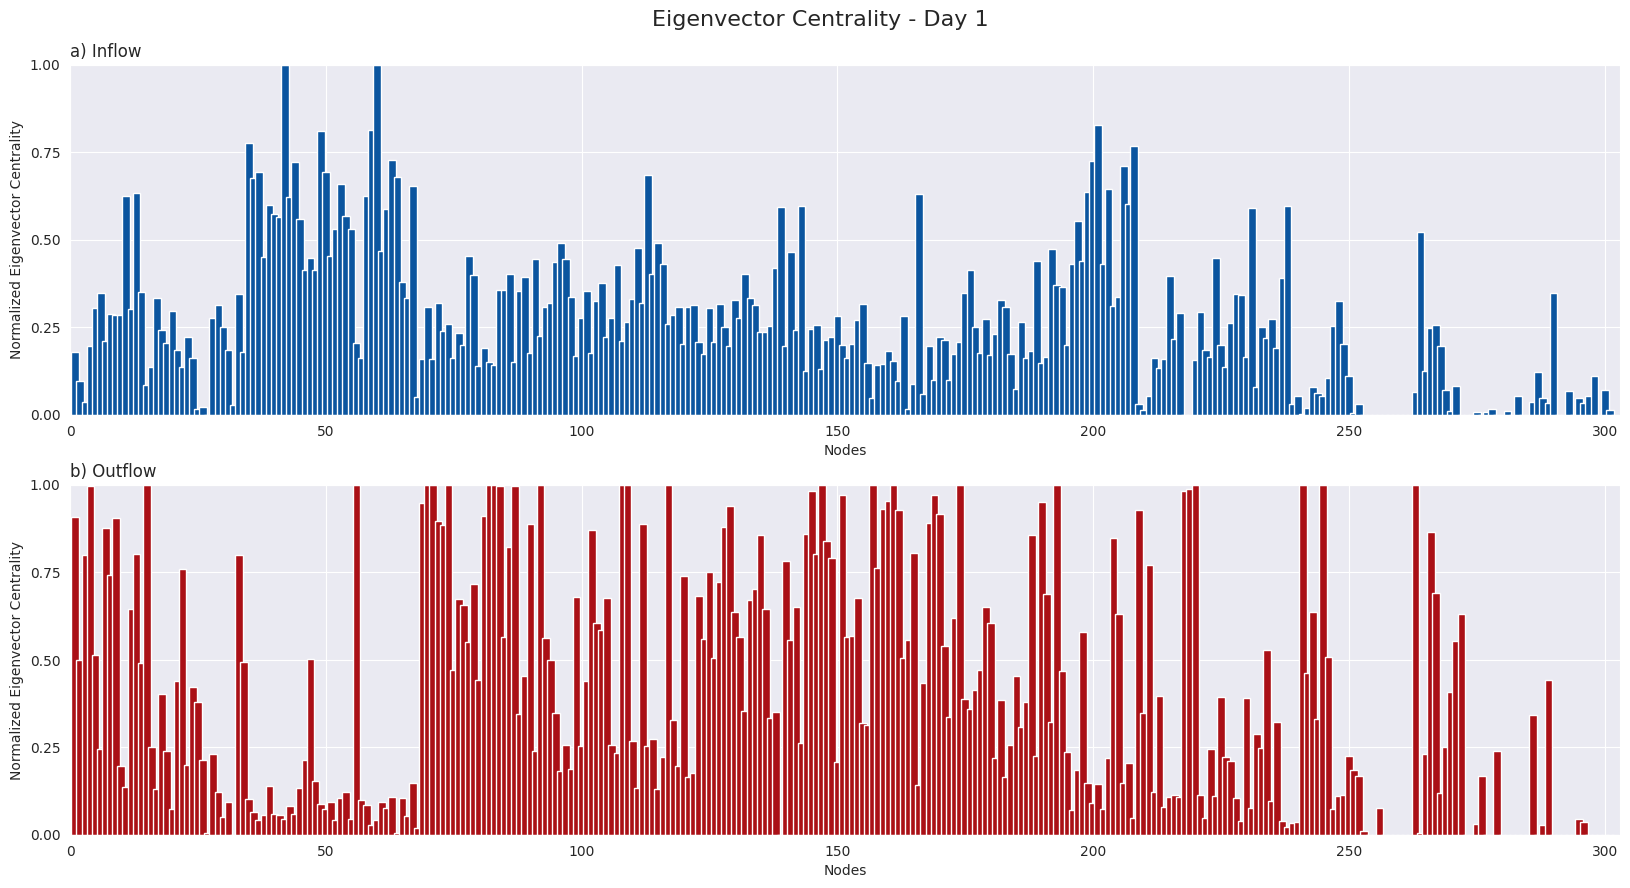

In [ ]:
base_color_1 = sns.color_palette("Blues")[5]
base_color_2 = sns.color_palette("Reds")[5]

# Create a light palette with 303 shades
palette_in = sns.light_palette(base_color_1, n_colors=303)
palette_out = sns.light_palette(base_color_2, n_colors=303)

days = np.arange(1, len(inflow_eigenvector_centrality_n) + 1)
nodes = np.arange(0, len(inflow_eigenvector_centrality_n[1]))

# Function to format y-axis ticks
def format_y_ticks(value, pos):
    return f'{value:.2f}'

# Create a bar plot
fig, (ax_inflow, ax_outflow) = plt.subplots(2, 1, figsize=(20, 10))
fig.suptitle(f'Eigenvector Centrality - Day {days[0]}', fontsize=16, y=.935)

# Inflow plot
ax_inflow.set_title('a) Inflow', loc='left')
ax_inflow.bar(nodes, inflow_eigenvector_centrality_nn[0], color=palette_in[-1], width=1.5)
ax_inflow.set_xlabel('Nodes', fontsize=10)
ax_inflow.set_ylabel('Normalized Eigenvector Centrality', fontsize=10)
ax_inflow.set_xlim(0, 303)
ax_inflow.set_ylim(0, 1.)

# Set y-axis ticks with the specified formatter and intervals
ax_inflow.yaxis.set_major_locator(ticker.MultipleLocator(base=0.25))
ax_inflow.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

# Outflow plot
ax_outflow.set_title('b) Outflow', loc='left')
ax_outflow.set_xlabel('Nodes', fontsize=10)
ax_outflow.set_ylabel('Normalized Eigenvector Centrality', fontsize=10)
ax_outflow.bar(nodes, outflow_eigenvector_centrality_nn[0], color=palette_out[-1], width=1.5)
ax_outflow.set_xlim(0, 303)
ax_outflow.set_ylim(0, 1.)

# Set y-axis ticks with the specified formatter and intervals
ax_outflow.yaxis.set_major_locator(ticker.MultipleLocator(base=0.25))
ax_outflow.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

plt.savefig(f'eigenvector_centrality_normalized_data_day_{days[0]}.pdf')
plt.show()

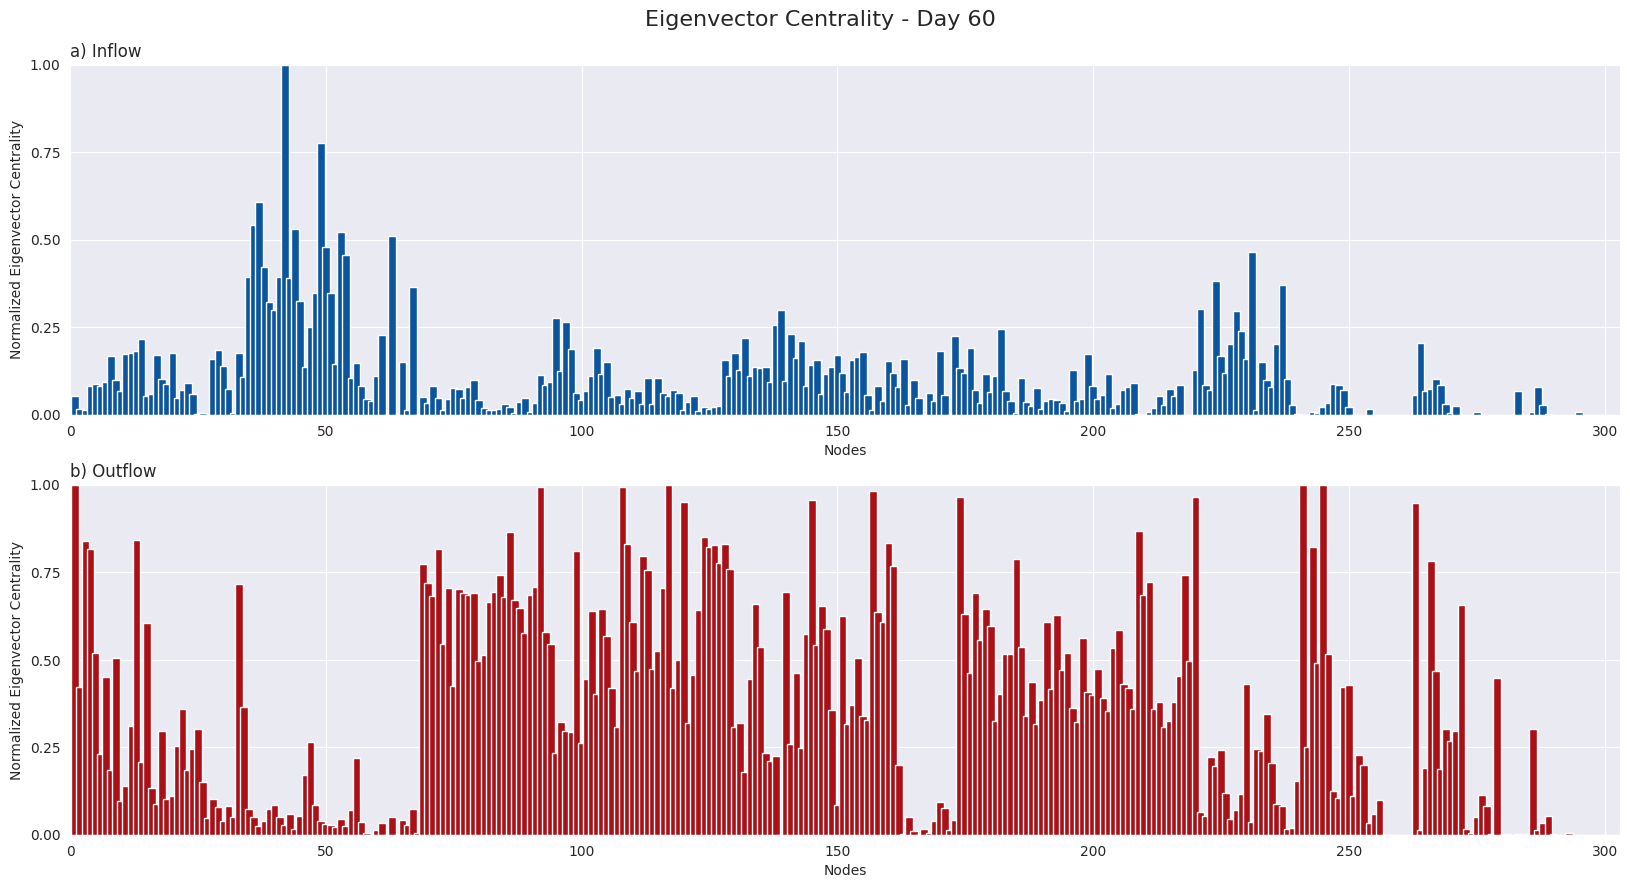

In [ ]:
# Create a bar plot
fig, (ax_inflow, ax_outflow) = plt.subplots(2, 1, figsize=(20, 10))
fig.suptitle(f'Eigenvector Centrality - Day {days[-1]}', fontsize=16, y=.935)

# Inflow plot
ax_inflow.set_title('a) Inflow', loc='left')
ax_inflow.bar(nodes, inflow_eigenvector_centrality_nn[-1], color=palette_in[-1], width=1.5)
ax_inflow.set_xlabel('Nodes', fontsize=10)
ax_inflow.set_ylabel('Normalized Eigenvector Centrality', fontsize=10)
ax_inflow.set_xlim(0, 303)
ax_inflow.set_ylim(0, 1.)

# Set y-axis ticks with the specified formatter and intervals
ax_inflow.yaxis.set_major_locator(ticker.MultipleLocator(base=0.25))
ax_inflow.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

# Outflow plot
ax_outflow.set_title('b) Outflow', loc='left')
ax_outflow.set_xlabel('Nodes', fontsize=10)
ax_outflow.set_ylabel('Normalized Eigenvector Centrality', fontsize=10)
ax_outflow.bar(nodes, outflow_eigenvector_centrality_nn[-1], color=palette_out[-1], width=1.5)
ax_outflow.set_xlim(0, 303)
ax_outflow.set_ylim(0, 1.)

# Set y-axis ticks with the specified formatter and intervals
ax_outflow.yaxis.set_major_locator(ticker.MultipleLocator(base=0.25))
ax_outflow.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))

plt.savefig(f'eigenvector_centrality_normalized_data_day_{days[-1]}.pdf')
plt.show()

In [ ]:
# Combine inflow and outflow metrics for analysis
all_metrics = {
    'inflow': inflow_eigenvector_centrality_nn,
    'outflow': outflow_eigenvector_centrality_nn
}

# Define the number of nodes and days
num_nodes = len(inflow_eigenvector_centrality_nn[0])
num_days = len(inflow_eigenvector_centrality_nn)

# Initialize dictionaries to store daily rankings
daily_rankings = {'inflow': {}, 'outflow': {}}

# Iterate through each metric (inflow and outflow)
for metric_type, metrics in all_metrics.items():
    for day in range(num_days):
        # Get eigenvector centrality for the current day
        current_day_metrics = metrics[day]

        # Find the indices to sort nodes based on metrics (from most to least influential)
        sorted_nodes = np.argsort(current_day_metrics)[::-1]

        # Store the node indices and corresponding scores in dictionaries
        daily_rankings[metric_type][day] = sorted_nodes

# Save the daily rankings to a pickle file
with open('daily_rankings.pkl', 'wb') as file:
    pk.dump(daily_rankings, file)

In [ ]:
with open('/content/drive/MyDrive/data_IC/metrics_evolution/betweenness_normalized_data.pkl', 'rb') as file:
  betweenness_n = pk.load(file)

inflow_betweenness_n, outflow_betweenness_n = betweenness_n

inflow_betweenness_n_normalized = [[d[key] for key in range(303)] for d in inflow_betweenness_n]
outflow_betweenness_n_normalized = [[d[key] for key in range(303)] for d in outflow_betweenness_n]

inflow_betweenness_nn_normalized = normalize_metrics(inflow_betweenness_n_normalized, len(inflow_betweenness_n_normalized))
outflow_betweenness_nn_normalized = normalize_metrics(outflow_betweenness_n_normalized, len(outflow_betweenness_n_normalized))

In [ ]:
# Combine inflow and outflow metrics for analysis
all_metrics = {
    'inflow': inflow_betweenness_nn_normalized,
    'outflow': outflow_betweenness_nn_normalized
}

# Define the number of nodes and days
num_nodes = 303
num_days = len(inflow_betweenness_n_normalized)

# Initialize dictionaries to store daily rankings
daily_rankings_bw = {'inflow': {}, 'outflow': {}}

# Iterate through each metric (inflow and outflow)
for in_out, metric in all_metrics.items():
    for day in range(num_days):
        # Get betweenness centrality for the current day
        current_day_metric = metric[day]
        # Find the indices to sort nodes based on metric (from most to least influential)
        sorted_nodes = np.argsort(current_day_metric)[::-1]
        # Store the node indices and corresponding scores in dictionaries
        daily_rankings_bw[in_out][day] = sorted_nodes


# Save the daily rankings to a pickle file
with open('daily_rankings_bw.pkl', 'wb') as file:
    pk.dump(daily_rankings_bw, file)

In [ ]:
# Supondo que daily_rankings_bw seja o dicionário conforme descrito, com as chaves "inflow" e "outflow" e seus valores correspondentes

# Calcular a medida de influência total para cada nó
total_influence = {}
for day in range(60):  # Iterar sobre os 60 dias
    for node in range(303):  # Iterar sobre os 303 nós
        # Somar as medidas de influência para inflow e outflow
        total_influence[node] = total_influence.get(node, 0) + daily_rankings_bw["inflow"][day][node] + daily_rankings_bw["outflow"][day][node]

# Ordenar os nós com base na medida de influência total
sorted_nodes = sorted(total_influence.items(), key=lambda x: x[1], reverse=True)

# Selecionar os 4 nós mais influentes e os 4 nós menos influentes
top_4_influential_nodes = sorted_nodes[:4]
bottom_4_influential_nodes = sorted_nodes[-4:]

# Imprimir os resultados
print("Top 4 nós mais influentes:")
for node, influence in top_4_influential_nodes:
    print(f"Nó: {node}, Influência total: {influence}")

print("\nBottom 4 nós menos influentes:")
for node, influence in bottom_4_influential_nodes:
    print(f"Nó: {node}, Influência total: {influence}")

Top 4 nós mais influentes:
Nó: 302, Influência total: 32732
Nó: 295, Influência total: 29499
Nó: 293, Influência total: 29099
Nó: 290, Influência total: 28766

Bottom 4 nós menos influentes:
Nó: 42, Influência total: 14378
Nó: 53, Influência total: 13922
Nó: 32, Influência total: 13779
Nó: 0, Influência total: 9876


# Integrating MAL equations and SIR equations

In [ ]:
def interpolate_k(t, k_array, t_days):
    t_index = np.searchsorted(t_days, t, side='right') - 1
    t_index = np.clip(t_index, 0, len(t_days) - 2)
    t0, t1 = t_days[t_index], t_days[t_index + 1]
    k0, k1 = k_array[t_index], k_array[t_index + 1]
    fraction = (t - t0) / (t1 - t0)
    k_t = k0 + fraction * (k1 - k0)
    return k_t

def verify_empirical_evidence(t, k_array_out, k_array_in, t_days):
    k_out_t = interpolate_k(t, k_array_out, t_days)
    k_in_t = interpolate_k(t, k_array_in, t_days)

    # Calcular a diferença entre as taxas de entrada e saída
    difference = k_in_t - k_out_t

    # Verificar se a soma dessas diferenças é igual a zero para cada nó
    for i in range(difference.shape[0]):
        node_difference_sum = np.sum(difference[i])
        print(f"Node {i} difference sum: {node_difference_sum}")
        if not np.isclose(node_difference_sum, 0):
            print(f"Empirical evidence not satisfied for node {i}")
        else:
            print(f"Empirical evidence satisfied for node {i}")

def mal_equations(t, c, k_array_out, k_array_in, t_days):
    k_out_t = interpolate_k(t, k_array_out, t_days)
    k_in_t = interpolate_k(t, k_array_in, t_days)
    return np.dot(k_in_t, c) - np.multiply(np.sum(k_out_t, axis=0), c)

def SIR_flux(t, y, beta, gamma, k_array_in, k_array_out, solution_MAL, t_days):
    """
    Modelo SIR com fluxo de movimento entre nós.

    Parâmetros:
        t: float
            Tempo.
        y: numpy array
            Vetor de estado do sistema [S_1, I_1, R_1, S_2, I_2, R_2, ..., S_K, I_K, R_K].
        beta: numpy array
            Taxas de transmissão para cada população.
        gamma: numpy array
            Taxas de recuperação para cada população.
        k_array_out: numpy array
            Matriz de adjacência de outflow entre os nós.
        k_array_in: numpy array
            Matriz de adjacência de inflow entre os nós.
        solution_MAL: scipy.integrate.OdeSolution
            Solução da integração do modelo de fluxo anterior.

    Retorna:
        dy_dt: numpy array
            Derivadas das equações diferenciais.
    """
    print(t)
    K = len(k_array_in[0])  # Número total de nós

    # Interpolação das matrizes de fluxo (k_array_out e k_array_in) ao tempo t
    k_in_t = interpolate_k(t, k_array_in, t_days)
    k_out_t = interpolate_k(t, k_array_out, t_days)

    # Dividindo o vetor de estado em compartimentos S, I e R para cada nó
    S = y[:K]
    I = y[K:2*K]
    R = y[2*K:]

    # Obtendo N_i diretamente de solution_MAL no tempo correspondente
    time_idx = np.searchsorted(solution_MAL.t, t) - 1
    N = solution_MAL.y[:, time_idx]

    # Calculando as derivadas das equações diferenciais
    dS_dt = -beta * S * I / N + np.dot(k_in_t, S) - np.multiply(np.sum(k_out_t, axis=0), S)
    dI_dt = beta * S * I / N - gamma * I + np.dot(k_in_t, I) - np.multiply(np.sum(k_out_t, axis=0), I)
    dR_dt = gamma * I + np.dot(k_in_t, R) - np.multiply(np.sum(k_out_t, axis=0), R)

    return np.hstack((dS_dt, dI_dt, dR_dt))

In [ ]:
t_span = (0, len(inflow))
N0 = np.array([500.] * len(inflow[0]))
t_eval = np.linspace(*t_span, 6000)

## Verify empirical evidence $\left(\sum_{j} (w_{ij}^{in} - w_{ij}^{out}) = 0 \right)$ with raw data and normalized

## Raw data

In [ ]:
# Resolver o sistema de ODEs
solution_MAL = solve_ivp(mal_equations, t_span, N0, args=(inflow, outflow, np.linspace(0, 6000, len(inflow))), t_eval=t_eval)

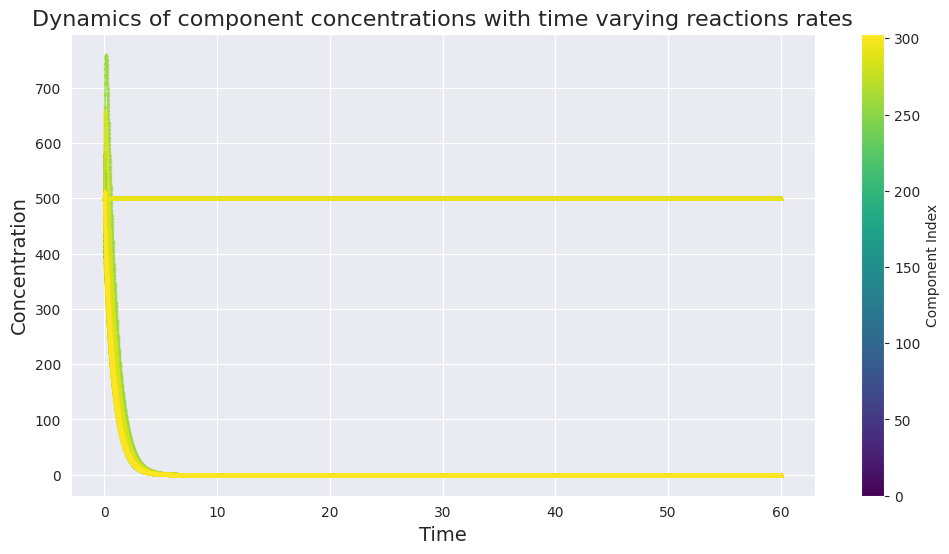

In [ ]:
# Plotar as soluções
plt.figure(figsize=(12, 6))

# Criar uma paleta de cores
colors = cm.viridis(np.linspace(0, 1, len(inflow[0])))

for i, color in zip(range(len(inflow[0])), colors):
    plt.plot(solution_MAL.t, solution_MAL.y[i], color=color, marker='^', markersize=2, alpha=.7)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Concentration', fontsize=14)

# Criar uma barra de cores para a legenda
cmap = cm.viridis
norm = plt.Normalize(0, len(inflow[0]))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Adicionar uma entrada na legenda
ax = plt.gca()
legend_handle = plt.colorbar(sm, ax=ax, label='Component Index', pad=0.05)

plt.title('Dynamics of component concentrations with time varying reactions rates', fontsize=16)
plt.savefig('/content/drive/MyDrive/data_IC/output/models_integrations/flux_model_raw.pdf')
plt.show()

### Check if the constraint $N = \sum_{i=1}^{K} N_{i}$ is validated

**The total number of hosts remains constant over time!**

In [ ]:
pd.DataFrame(solution_MAL.y.T).sum(axis=1)

0       151500.000000
1       150136.648638
2       148531.745370
3       146859.023018
4       145172.592560
            ...      
5995      3999.999993
5996      4000.000001
5997      3999.999997
5998      3999.999997
5999      3999.999999
Length: 6000, dtype: float64

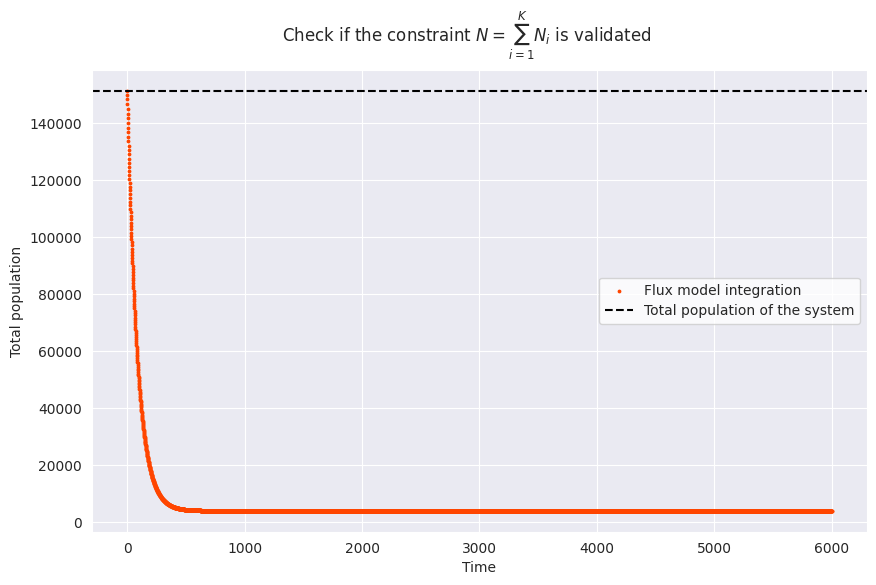

In [ ]:
# Calcular a linha horizontal no valor 303 * 500
horizontal_line_value = 303 * 500

# Plotar os valores e a linha horizontal
plt.figure(figsize=(10, 6))
plt.scatter(x=np.arange(len(pd.DataFrame(solution_MAL.y.T).sum(axis=1))), y=pd.DataFrame(solution_MAL.y.T).sum(axis=1), label='Flux model integration', s=3, c='orangered')
plt.axhline(y=horizontal_line_value, color='black', linestyle='--', label=f'Total population of the system')

plt.xlabel('Time')
plt.ylabel('Total population')
plt.suptitle(r'Check if the constraint $N = \sum_{i=1}^{K} N_{i}$ is validated')
plt.legend(facecolor='white', fontsize='medium')
plt.show()

**So perform this model using the raw data will not work!**

## Normalized data

In [ ]:
# Resolver o sistema de ODEs
solution_MAL = solve_ivp(mal_equations, t_span, N0, args=(inflow_n, outflow_n, np.linspace(0, 6000, len(inflow))), t_eval=t_eval)

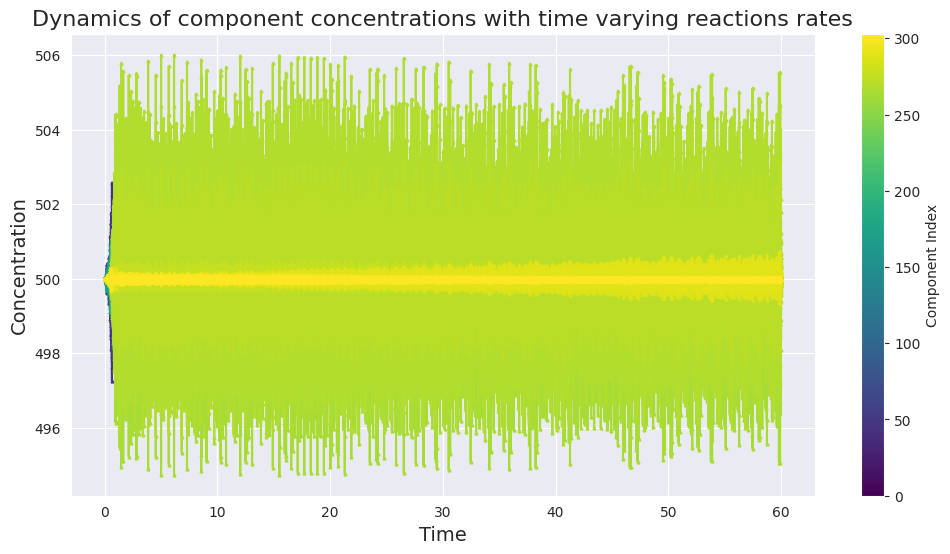

In [ ]:
# Plotar as soluções
plt.figure(figsize=(12, 6))

# Criar uma paleta de cores
colors = cm.viridis(np.linspace(0, 1, len(inflow_n[0])))

for i, color in zip(range(len(inflow_n[0])), colors):
    plt.plot(solution_MAL.t, solution_MAL.y[i], color=color, marker='^', markersize=2)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Concentration', fontsize=14)

# Criar uma barra de cores para a legenda
cmap = cm.viridis
norm = plt.Normalize(0, len(inflow_n[0]))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Adicionar uma entrada na legenda
ax = plt.gca()
legend_handle = plt.colorbar(sm, ax=ax, label='Component Index', pad=0.05)

plt.title('Dynamics of component concentrations with time varying reactions rates', fontsize=16)
plt.savefig('/content/drive/MyDrive/data_IC/output/models_integrations/flux_model_normalized.pdf')
plt.show()

### Check if the constraint $N = \sum_{i=1}^{K} N_{i}$ is validated

**The total number of hosts remains constant over time!**

In [ ]:
pd.DataFrame(solution_MAL.y.T).sum(axis=1)

0       151500.000000
1       151500.000000
2       151500.000000
3       151500.000000
4       151500.000000
            ...      
5995    151499.116196
5996    151505.274635
5997    151498.907068
5998    151503.059759
5999    151501.625649
Length: 6000, dtype: float64

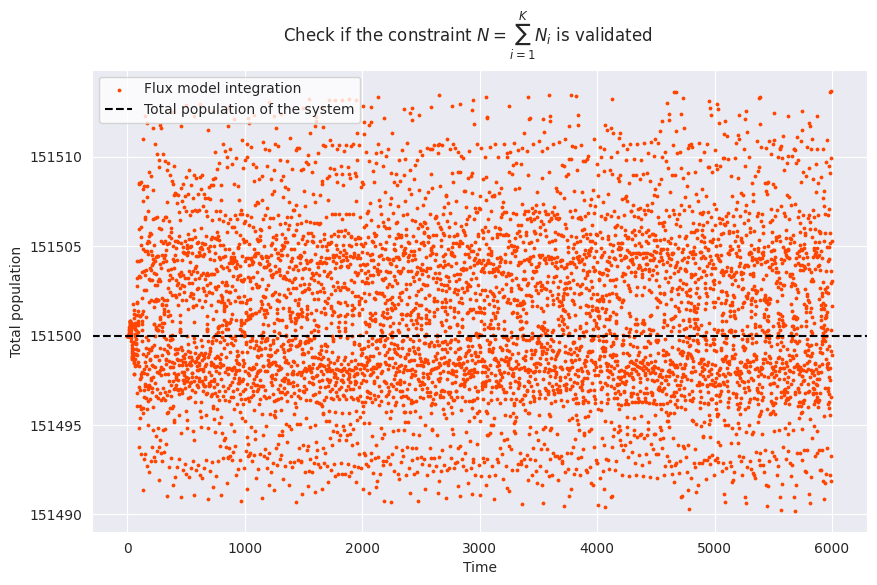

In [ ]:
# Calcular a linha horizontal no valor 303 * 500
horizontal_line_value = 303 * 500

# Plotar os valores e a linha horizontal
plt.figure(figsize=(10, 6))
plt.scatter(x=np.arange(len(pd.DataFrame(solution_MAL.y.T).sum(axis=1))), y=pd.DataFrame(solution_MAL.y.T).sum(axis=1), label='Flux model integration', s=3, c='orangered')
plt.axhline(y=horizontal_line_value, color='black', linestyle='--', label=f'Total population of the system')

plt.xlabel('Time')
plt.ylabel('Total population')
plt.suptitle(r'Check if the constraint $N = \sum_{i=1}^{K} N_{i}$ is validated')
plt.legend(facecolor='white', fontsize='medium')
plt.show()